### Group-1 - Final project submission.

Team members
 - Anil Nair
 - Maadhu K
 - Prasad
 - Kedar
 - Hiran
 
Dataset used:- **Bank Marketing Data Set** (https://archive.ics.uci.edu/ml/datasets/bank+marketing)

In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bank_add_full = pd.read_csv('bank-additional-full.csv',sep=';')

### bank_add_full data with shape of 41188 x 21 will be used for modelling.

- age               
- job               
- marital           
- education         
- default           
- housing          
- loan             
- contact           
- month              
- day_of_week  
- duration             
- pdays              
- previous           
- poutcome           
- emp.var.rate      
- cons.price.idx     
- cons.conf.idx      
- euribor3m          
- nr.employed        
- y                  

### Performing exploratory data analysis for the category variables in the dataset.

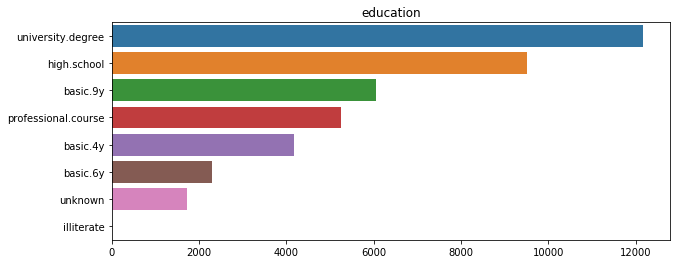

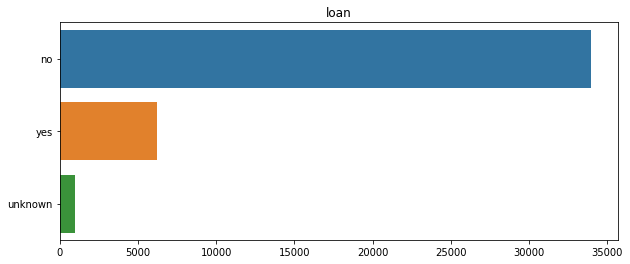

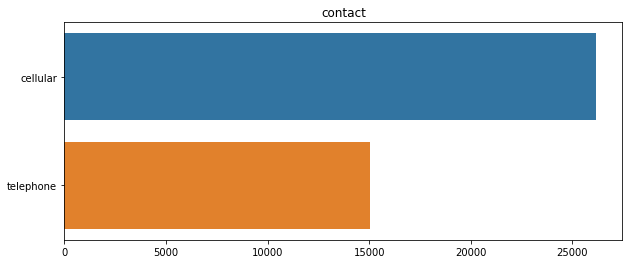

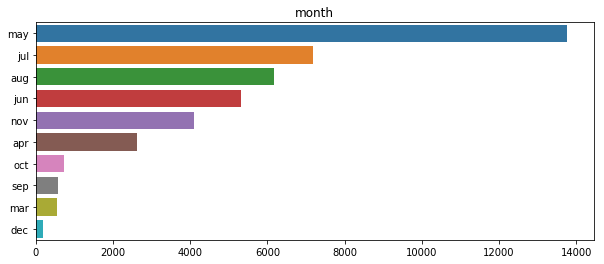

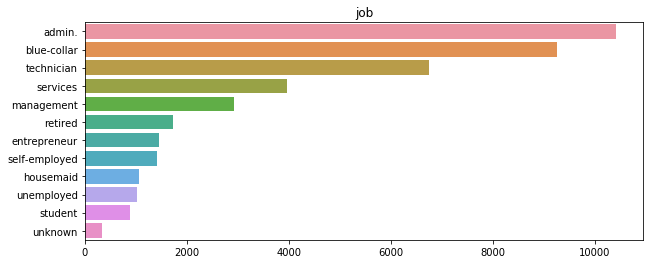

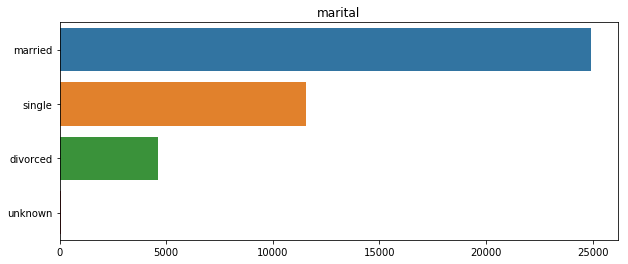

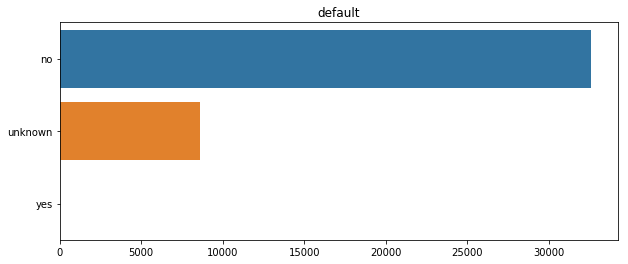

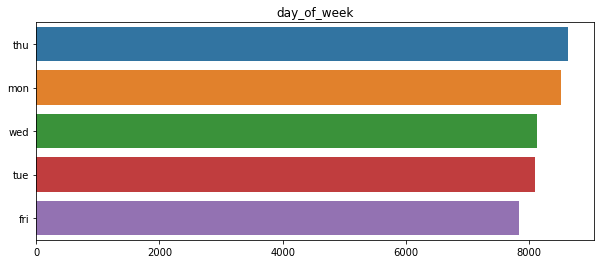

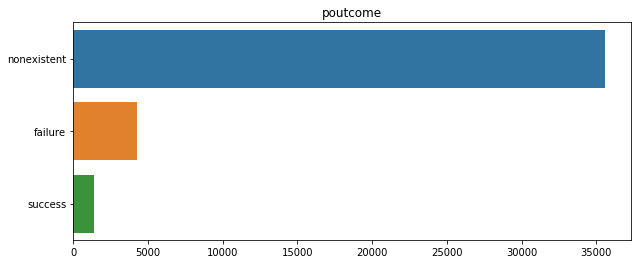

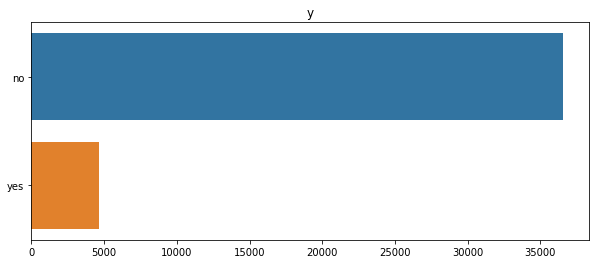

In [3]:
categ_vars = ['education', 'loan', 'contact', 'month', 'job', 'marital',  'default', 'day_of_week', 'poutcome','y']
for col in categ_vars:
    plt.figure(figsize=(10,4))
    sns.barplot(bank_add_full[col].value_counts().values, bank_add_full[col].value_counts().index)
    plt.title(col)

#### Since the duration of the call is variable which will be obtained after the completion of the call itself, including this 
#### predictor will not be accurate. Hence dropping the variable 'duration' from the dataset. 

In [4]:
#Dropping the duration column
bank_add_full.drop('duration',axis=1,inplace=True)

#### For all the categorical variables in the data set, we are adding dummy variables to represent the multiple levels.

In [5]:
# Function to create dummy variables for an input categorical column

def encode_categ_vars(var,df):

    #Generating dummies for input variable
    var_dummies=pd.get_dummies(df[var],prefix=var)
    
    #Dropping one column from the dummy vars to avoid collinearity
    var_dummies=var_dummies.drop(var_dummies.columns[0],axis=1)

    # #Appending the dummy variables to the original dataset.
    df = df.join(var_dummies)

    #Dropping the original variable from dataset
    df.drop(var,axis=1,inplace=True)
        
    return(df)

In [6]:
#Generate dummies for job column
bank_add_full=encode_categ_vars('job',bank_add_full)

In [7]:
#Generate dummies for marital column
bank_add_full=encode_categ_vars('marital',bank_add_full)

In [8]:
#Generate dummies for education column
bank_add_full=encode_categ_vars('education',bank_add_full)

In [9]:
#Generate dummies for default column
bank_add_full=encode_categ_vars('default',bank_add_full)

In [10]:
#Generate dummies for housing column
bank_add_full=encode_categ_vars('housing',bank_add_full)

In [11]:
#Generate dummies for loan column
bank_add_full=encode_categ_vars('loan',bank_add_full)

In [12]:
#Generate dummies for contact column
bank_add_full=encode_categ_vars('contact',bank_add_full)

In [13]:
#Generate dummies for month column
bank_add_full=encode_categ_vars('month',bank_add_full)

In [14]:
#Generate dummies for day_of_week column
bank_add_full=encode_categ_vars('day_of_week',bank_add_full)

In [15]:
#Generate dummies for poutcome column
bank_add_full=encode_categ_vars('poutcome',bank_add_full)

C:\Users\Hiran\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,pdays
pdays,
0,15
1,26
2,61
3,439
4,118
5,46
6,412
7,60
8,18


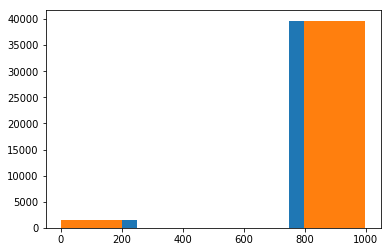

In [16]:
plt.hist(bank_add_full['pdays'], bins=4)
plt.hist(bank_add_full['pdays'], bins=5)
bank_add_full.groupby('pdays')['pdays'].agg({'pdays':'count'})

#### For pdays variable, since more than 40k (~>95%) rows have a value of 999, this predictor can affect the model performance.
#### As a workaround, the values are converted in to bins. Following dummy columns were added.
- pdays_0_7
- pdays_8-15
- pdays_16_23
- pdays_24_31
- pdays_never_contacted

In [17]:
pdays_0_7 = bank_add_full['pdays'].map(lambda x:1 if x <=7 else 0)
pdays_8_15 = bank_add_full['pdays'].map(lambda x:1 if x <=15 and x >=8 else 0)
pdays_16_23 = bank_add_full['pdays'].map(lambda x:1 if x <=23 and x >=16 else 0)
pdays_24_31 = bank_add_full['pdays'].map(lambda x:1 if x <=31 and x >=24 else 0)
pdays_never_contacted = bank_add_full['pdays'].map(lambda x:1 if x >=32 else 0)

In [18]:
pd_df = pd.DataFrame({'pdays_0_7':pdays_0_7,'pdays_8_15':pdays_8_15,'pdays_16_23':pdays_16_23,\
                      'pdays_24_31':pdays_24_31,'pdays_never_contacted':pdays_never_contacted})
bank_add_full = bank_add_full.join(pd_df)
bank_add_full = bank_add_full.drop('pdays',axis=1)

#Dropping one of the dummy columns to avoid collinearity
bank_add_full=bank_add_full.drop('pdays_24_31',axis=1)

### As the objective here is to identify if the customer will subscribe to a term deposit, we are using the logistic regression model to predict the binary classification outcome.

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(bank_add_full.drop('y',axis=1),bank_add_full['y'],test_size = 0.3,\
                                                random_state = 123)

Using statsmodel package to build a binomial GLM.

In [20]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
Y_train = Y_train.map(lambda x: 1 if str(x) == 'yes' else 0)
Y_test = Y_test.map(lambda x: 1 if str(x) == 'yes' else 0)
Y_train.describe()

count    28831.000000
mean         0.112518
std          0.316008
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64

**Using backward elimination technique for stepwise regression to remove the statistically insignificant predictors.** 

- Assuming confidence level of 95%

Since majority of the predictors in the dataset are categorical values, if one of the levels of the predictor is found insignificant in a step, all the levels of that predictor is removed for the next iteration.

**Iteration - 1**

- All predictors are used

In [21]:
logit = sm.GLM(Y_train, X_train, family=sm.families.Binomial())
result = logit.fit()
print(result.summary2())

                            Results: Generalized linear model
Model:                      GLM                      AIC:                    16038.7789  
Link Function:              logit                    BIC:                    -279577.9066
Dependent Variable:         y                        Log-Likelihood:         -7964.4     
Date:                       2018-11-23 20:02         LL-Null:                -10141.     
No. Observations:           28831                    Deviance:               15929.      
Df Model:                   54                       Pearson chi2:           2.93e+04    
Df Residuals:               28776                    Scale:                  1.0000      
Method:                     IRLS                                                         
-----------------------------------------------------------------------------------------
                                Coef.    Std.Err.     z     P>|z|     [0.025     0.975]  
--------------------------------------

** Iteration -2 **
- Dropping the dummy columns **'pdays_0_7','pdays_7_14','pdays_14_21','pdays_never_contacted' ** 
 as the p-values are above the threshold

In [22]:

#Removing pdays from the list of predictors
X_train=X_train.drop(['pdays_0_7','pdays_8_15','pdays_16_23','pdays_never_contacted'], \
             axis=1)

#Removing pdays from the list of predictors
X_test=X_test.drop(['pdays_0_7','pdays_8_15','pdays_16_23','pdays_never_contacted'], \
             axis=1)

logit = sm.GLM(Y_train, X_train, family=sm.families.Binomial())
result = logit.fit()
print(result.summary2())

                            Results: Generalized linear model
Model:                      GLM                      AIC:                    16060.7311  
Link Function:              logit                    BIC:                    -279589.0313
Dependent Variable:         y                        Log-Likelihood:         -7979.4     
Date:                       2018-11-23 20:02         LL-Null:                -10141.     
No. Observations:           28831                    Deviance:               15959.      
Df Model:                   50                       Pearson chi2:           2.93e+04    
Df Residuals:               28780                    Scale:                  1.0000      
Method:                     IRLS                                                         
-----------------------------------------------------------------------------------------
                                Coef.    Std.Err.     z     P>|z|     [0.025     0.975]  
--------------------------------------

** Iteration -3 **
- Dropping the dummy columns **default_unknown , default_yes** as the p-values are above the threshold

In [23]:
#Dropping the default column from  predictors
X_train=X_train.drop(['default_unknown','default_yes'],axis=1)
X_test=X_test.drop(['default_unknown','default_yes'],axis=1)
logit = sm.GLM(Y_train, X_train, family=sm.families.Binomial())
result = logit.fit()
print(result.summary2())

                         Results: Generalized linear model
Model:                     GLM                    AIC:                  16068.2603  
Link Function:             logit                  BIC:                  -279598.0405
Dependent Variable:        y                      Log-Likelihood:       -7985.1     
Date:                      2018-11-23 20:02       LL-Null:              -10141.     
No. Observations:          28831                  Deviance:             15970.      
Df Model:                  48                     Pearson chi2:         2.92e+04    
Df Residuals:              28782                  Scale:                1.0000      
Method:                    IRLS                                                     
------------------------------------------------------------------------------------
                                Coef.   Std.Err.    z     P>|z|    [0.025    0.975] 
------------------------------------------------------------------------------------
const 

** Iteration - 4 **
- Dropping the dummy columns **'job_blue-collar','job_entrepreneur','job_housemaid','job_management','job_retired', 
'job_self-employed','job_services','job_student','job_technician','job_unemployed','job_unknown' ** 
 as the p-values are above the threshold

In [24]:

#Removing job from the list of predictors
X_train=X_train.drop(['job_blue-collar','job_entrepreneur','job_housemaid','job_management','job_retired', \
'job_self-employed','job_services','job_student','job_technician','job_unemployed','job_unknown'], \
             axis=1)
#Removing job from the list of predictors
X_test=X_test.drop(['job_blue-collar','job_entrepreneur','job_housemaid','job_management','job_retired', \
'job_self-employed','job_services','job_student','job_technician','job_unemployed','job_unknown'], \
             axis=1)


In [25]:
logit = sm.GLM(Y_train, X_train, family=sm.families.Binomial())
result = logit.fit()
print(result.summary2())

                         Results: Generalized linear model
Model:                     GLM                    AIC:                  16073.0444  
Link Function:             logit                  BIC:                  -279684.2177
Dependent Variable:        y                      Log-Likelihood:       -7998.5     
Date:                      2018-11-23 20:02       LL-Null:              -10141.     
No. Observations:          28831                  Deviance:             15997.      
Df Model:                  37                     Pearson chi2:         2.91e+04    
Df Residuals:              28793                  Scale:                1.0000      
Method:                    IRLS                                                     
------------------------------------------------------------------------------------
                                Coef.   Std.Err.    z     P>|z|    [0.025    0.975] 
------------------------------------------------------------------------------------
const 

** Iteration - 5 **
- Dropping the dummy columns **'education_basic.6y','education_basic.9y','education_high.school','education_illiterate',  'education_professional.course','education_university.degree','education_unknown' **  as the p-values are above the threshold

In [26]:
#Dropping the education column from  predictors
X_train=X_train.drop(['education_basic.6y','education_basic.9y','education_high.school','education_illiterate',\
                      'education_professional.course','education_university.degree','education_unknown'],axis=1)
X_test=X_test.drop(['education_basic.6y','education_basic.9y','education_high.school','education_illiterate',\
                      'education_professional.course','education_university.degree','education_unknown'],axis=1)
logit = sm.GLM(Y_train, X_train, family=sm.families.Binomial())
result = logit.fit()
print(result.summary2())

                     Results: Generalized linear model
Model:                  GLM                 AIC:               16071.5024  
Link Function:          logit               BIC:               -279743.6441
Dependent Variable:     y                   Log-Likelihood:    -8004.8     
Date:                   2018-11-23 20:02    LL-Null:           -10141.     
No. Observations:       28831               Deviance:          16010.      
Df Model:               30                  Pearson chi2:      2.90e+04    
Df Residuals:           28800               Scale:             1.0000      
Method:                 IRLS                                               
---------------------------------------------------------------------------
                       Coef.   Std.Err.    z     P>|z|    [0.025    0.975] 
---------------------------------------------------------------------------
const                -239.6558  40.0150  -5.9892 0.0000 -318.0837 -161.2279
age                     0.0021   

** Iteration - 6 **
- Dropping the dummy columns **''month_aug','month_dec','month_jul','month_jun','month_mar',                  'month_may','month_nov','month_oct','month_sep' ** as the p-values are above the threshold

In [27]:
#Dropping the month column from  predictors
X_train=X_train.drop(['month_aug','month_dec','month_jul','month_jun','month_mar',\
                      'month_may','month_nov','month_oct','month_sep'],axis=1)
X_test=X_test.drop(['month_aug','month_dec','month_jul','month_jun','month_mar',\
                    'month_may','month_nov','month_oct','month_sep'],axis=1)
logit = sm.GLM(Y_train, X_train, family=sm.families.Binomial())
result = logit.fit()
print(result.summary2())

                    Results: Generalized linear model
Model:                 GLM                 AIC:               16371.6846  
Link Function:         logit               BIC:               -279517.8847
Dependent Variable:    y                   Log-Likelihood:    -8163.8     
Date:                  2018-11-23 20:02    LL-Null:           -10141.     
No. Observations:      28831               Deviance:          16328.      
Df Model:              21                  Pearson chi2:      2.95e+04    
Df Residuals:          28809               Scale:             1.0000      
Method:                IRLS                                               
--------------------------------------------------------------------------
                       Coef.   Std.Err.    z     P>|z|    [0.025   0.975] 
--------------------------------------------------------------------------
const                -115.3056  17.3817  -6.6337 0.0000 -149.3731 -81.2381
age                     0.0048   0.0020   2.40

** Iteration - 7 **
- Dropping the dummy columns ** nr.employed ** as the p-values are above the threshold

In [28]:
#Dropping the nr.employed column from  predictors
X_train=X_train.drop(['nr.employed'],axis=1)
X_test=X_test.drop(['nr.employed'],axis=1)
logit = sm.GLM(Y_train, X_train, family=sm.families.Binomial())
result = logit.fit()
print(result.summary2())

                     Results: Generalized linear model
Model:                  GLM                 AIC:               16369.7743  
Link Function:          logit               BIC:               -279528.0643
Dependent Variable:     y                   Log-Likelihood:    -8163.9     
Date:                   2018-11-23 20:02    LL-Null:           -10141.     
No. Observations:       28831               Deviance:          16328.      
Df Model:               20                  Pearson chi2:      2.95e+04    
Df Residuals:           28810               Scale:             1.0000      
Method:                 IRLS                                               
---------------------------------------------------------------------------
                       Coef.   Std.Err.    z     P>|z|    [0.025    0.975] 
---------------------------------------------------------------------------
const                -120.1156   6.6048 -18.1862 0.0000 -133.0607 -107.1705
age                     0.0048   

**Iteration - 7**

Dropping the dummy columns **euribor3m** as the p-values are above the threshold

In [29]:
#Dropping the euribor3m column from  predictors
X_train=X_train.drop(['euribor3m'],axis=1)
X_test=X_test.drop(['euribor3m'],axis=1)
logit = sm.GLM(Y_train, X_train, family=sm.families.Binomial())
result = logit.fit()
print(result.summary2())

                     Results: Generalized linear model
Model:                  GLM                 AIC:               16368.0266  
Link Function:          logit               BIC:               -279538.0812
Dependent Variable:     y                   Log-Likelihood:    -8164.0     
Date:                   2018-11-23 20:02    LL-Null:           -10141.     
No. Observations:       28831               Deviance:          16328.      
Df Model:               19                  Pearson chi2:      2.95e+04    
Df Residuals:           28811               Scale:             1.0000      
Method:                 IRLS                                               
---------------------------------------------------------------------------
                       Coef.   Std.Err.    z     P>|z|    [0.025    0.975] 
---------------------------------------------------------------------------
const                -118.0441   5.1544 -22.9014 0.0000 -128.1466 -107.9416
age                     0.0048   

**Iteration - 8**

Dropping the dummy columns **'marital_married','marital_single','marital_unknown'** as the p-values are above the threshold

In [30]:
#Dropping the marital_status column from  predictors
X_train=X_train.drop(['marital_married','marital_single','marital_unknown'],axis=1)
X_test=X_test.drop(['marital_married','marital_single','marital_unknown'],axis=1)
logit = sm.GLM(Y_train, X_train, family=sm.families.Binomial())
result = logit.fit()
print(result.summary2())

                     Results: Generalized linear model
Model:                  GLM                 AIC:               16378.4549  
Link Function:          logit               BIC:               -279552.4605
Dependent Variable:     y                   Log-Likelihood:    -8172.2     
Date:                   2018-11-23 20:02    LL-Null:           -10141.     
No. Observations:       28831               Deviance:          16344.      
Df Model:               16                  Pearson chi2:      2.95e+04    
Df Residuals:           28814               Scale:             1.0000      
Method:                 IRLS                                               
---------------------------------------------------------------------------
                       Coef.   Std.Err.    z     P>|z|    [0.025    0.975] 
---------------------------------------------------------------------------
const                -119.4844   5.1416 -23.2389 0.0000 -129.5617 -109.4072
age                     0.0011   

**Iteration - 9**

Dropping the dummy columns **age** as the p-values are above the threshold

In [31]:
#Dropping the age column from  predictors
X_train=X_train.drop(['age'],axis=1)
X_test=X_test.drop(['age'],axis=1)
logit = sm.GLM(Y_train, X_train, family=sm.families.Binomial())
result = logit.fit()
print(result.summary2())

                     Results: Generalized linear model
Model:                  GLM                 AIC:               16376.8584  
Link Function:          logit               BIC:               -279562.3262
Dependent Variable:     y                   Log-Likelihood:    -8172.4     
Date:                   2018-11-23 20:02    LL-Null:           -10141.     
No. Observations:       28831               Deviance:          16345.      
Df Model:               15                  Pearson chi2:      2.95e+04    
Df Residuals:           28815               Scale:             1.0000      
Method:                 IRLS                                               
---------------------------------------------------------------------------
                       Coef.   Std.Err.    z     P>|z|    [0.025    0.975] 
---------------------------------------------------------------------------
const                -119.5786   5.1398 -23.2652 0.0000 -129.6524 -109.5047
campaign               -0.0360   

**Iteration - 10**

Dropping the dummy columns **'day_of_week_mon','day_of_week_thu','day_of_week_tue','day_of_week_wed'** as the p-values are above the threshold

In [32]:
#Dropping the day_of_week column from  predictors
X_train=X_train.drop(['day_of_week_mon','day_of_week_thu','day_of_week_tue','day_of_week_wed'],axis=1)
X_test=X_test.drop(['day_of_week_mon','day_of_week_thu','day_of_week_tue','day_of_week_wed'],axis=1)
logit = sm.GLM(Y_train, X_train, family=sm.families.Binomial())
result = logit.fit()
print(result.summary2())

                     Results: Generalized linear model
Model:                  GLM                 AIC:               16397.3835  
Link Function:          logit               BIC:               -279574.8779
Dependent Variable:     y                   Log-Likelihood:    -8186.7     
Date:                   2018-11-23 20:02    LL-Null:           -10141.     
No. Observations:       28831               Deviance:          16373.      
Df Model:               11                  Pearson chi2:      2.94e+04    
Df Residuals:           28819               Scale:             1.0000      
Method:                 IRLS                                               
---------------------------------------------------------------------------
                       Coef.   Std.Err.    z     P>|z|    [0.025    0.975] 
---------------------------------------------------------------------------
const                -118.4266   5.1254 -23.1060 0.0000 -128.4721 -108.3811
campaign               -0.0387   

**Iteration - 11**

Dropping the dummy columns **'housing_yes','housing_unknown'** as the p-values are above the threshold

In [33]:
#Dropping the housing column from  predictors
X_train=X_train.drop(['housing_yes','housing_unknown'],axis=1)
X_test=X_test.drop(['housing_yes','housing_unknown'],axis=1)
logit = sm.GLM(Y_train, X_train, family=sm.families.Binomial())
result = logit.fit()
print(result.summary2())

                     Results: Generalized linear model
Model:                  GLM                 AIC:               16396.1763  
Link Function:          logit               BIC:               -279584.3543
Dependent Variable:     y                   Log-Likelihood:    -8187.1     
Date:                   2018-11-23 20:02    LL-Null:           -10141.     
No. Observations:       28831               Deviance:          16374.      
Df Model:               10                  Pearson chi2:      2.94e+04    
Df Residuals:           28820               Scale:             1.0000      
Method:                 IRLS                                               
---------------------------------------------------------------------------
                       Coef.   Std.Err.    z     P>|z|    [0.025    0.975] 
---------------------------------------------------------------------------
const                -118.4848   5.1244 -23.1215 0.0000 -128.5285 -108.4411
campaign               -0.0388   

**Iteration - 12**

Dropping the dummy columns **'loan_unknown','loan_yes'** as the p-values are above the threshold

In [34]:
#Dropping the housing column from  predictors
X_train=X_train.drop(['loan_unknown','loan_yes'],axis=1)
X_test=X_test.drop(['loan_unknown','loan_yes'],axis=1)
logit = sm.GLM(Y_train, X_train, family=sm.families.Binomial())
result = logit.fit()
print(result.summary2())

                     Results: Generalized linear model
Model:                  GLM                 AIC:               16393.9318  
Link Function:          logit               BIC:               -279603.1372
Dependent Variable:     y                   Log-Likelihood:    -8188.0     
Date:                   2018-11-23 20:02    LL-Null:           -10141.     
No. Observations:       28831               Deviance:          16376.      
Df Model:               8                   Pearson chi2:      2.94e+04    
Df Residuals:           28822               Scale:             1.0000      
Method:                 IRLS                                               
---------------------------------------------------------------------------
                       Coef.   Std.Err.    z     P>|z|    [0.025    0.975] 
---------------------------------------------------------------------------
const                -118.3776   5.1236 -23.1044 0.0000 -128.4197 -108.3356
campaign               -0.0387   

**Iteration - 13**

Dropping the dummy columns **previous** as the p-values are above the threshold

In [35]:
#Dropping the previous column from  predictors
X_train=X_train.drop(['previous'],axis=1)
X_test=X_test.drop(['previous'],axis=1)
logit = sm.GLM(Y_train, X_train, family=sm.families.Binomial())
result = logit.fit()
print(result.summary2())

                     Results: Generalized linear model
Model:                  GLM                 AIC:               16393.8001  
Link Function:          logit               BIC:               -279611.5382
Dependent Variable:     y                   Log-Likelihood:    -8188.9     
Date:                   2018-11-23 20:02    LL-Null:           -10141.     
No. Observations:       28831               Deviance:          16378.      
Df Model:               7                   Pearson chi2:      2.94e+04    
Df Residuals:           28823               Scale:             1.0000      
Method:                 IRLS                                               
---------------------------------------------------------------------------
                       Coef.   Std.Err.    z     P>|z|    [0.025    0.975] 
---------------------------------------------------------------------------
const                -120.1418   4.9587 -24.2285 0.0000 -129.8607 -110.4230
campaign               -0.0386   

** After 13 steps, the resultant model has all significant predictors. Following predictors were found to be significant
in the final model**

- campaign               
- emp.var.rate           
- cons.price.idx         
- cons.conf.idx          
- contact_telephone      
- poutcome_nonexistent   
- poutcome_success       

Using the resultant model to predict the outcomes of test dataset

In [36]:
X_test = sm.add_constant(X_test)
probabilities = result.predict(X_test)
predicted_classes = probabilities.map(lambda x: 'yes' if x > 0.5 else 'no')

** Computing accuracy of the model **
- Using a default threshold probability of 0.5

In [37]:
Y_test_encoded = Y_test.map(lambda x : 'yes' if x == 1 else 'no')
accuracy = sum(predicted_classes == Y_test_encoded) / len(Y_test)
print(accuracy)

0.9011086833373796


In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
auc = roc_auc_score(Y_test, probabilities)
print(auc)

0.7870766541651059


** Model is having an accuracy of 0.901 and AUC value of 0.787 **  (with threshold probability of 0.5)

Plotting AUC curve

In [39]:
fpr, tpr, threshold = roc_curve(Y_test, probabilities)

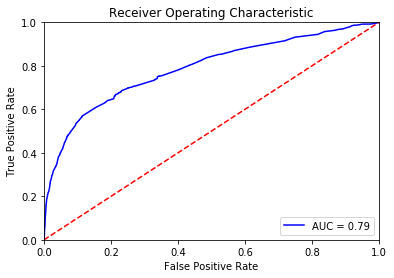

In [40]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

** Computing the optimal threshold probability from the ROC curve parms **

In [41]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]
print(optimal_threshold)

0.1554615344569344


** Using the new threshold probability of 0.15 to re-compute the classes. **

In [42]:
new_predicted_classes = probabilities.map(lambda x: 'yes' if x > optimal_threshold else 'no')
Y_test_encoded = Y_test.map(lambda x : 'yes' if x == 1 else 'no')
accuracy = sum(new_predicted_classes == Y_test_encoded) / len(Y_test)
print(accuracy)

0.850530063931375


** Computing the confusion matrix **

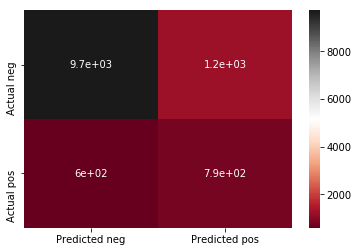

In [43]:
new_predictions_encoded = new_predicted_classes.map(lambda x: 1 if x == 'yes' else 0)
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(Y_test_encoded, new_predicted_classes)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
_=sns.heatmap(confusion_df, cmap='RdGy', annot=True)

** Calculating precision and recall scores **

In [44]:
from sklearn.metrics import precision_score, recall_score
precision_score(Y_test, new_predictions_encoded)
# print(predicted_classes)

0.38929798723613157

In [45]:
recall_score(Y_test, new_predictions_encoded)

0.5680515759312321

### The final logistic regression model is found to have an accuracy score of 0.85 and precision score of 0.38
 - AUC score for the best fit model was found to be 0.79

** In pursuit of improving the accuracy of the model, random forest classification is implemented in combination with GridSearch cross-validation **

# Random Forest classification 
 - using GridSearchCV for optimized hyperparameters
 - n_estimators = 500
 - For gridsearch, the max_depth values of 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None were iterated.

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf_model = RandomForestClassifier(n_estimators=500, n_jobs=-1,random_state=123)

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid=[{"max_depth":[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]}]
gs=GridSearchCV(estimator=rf_model, \
               param_grid = param_grid,cv=10)

** Fitting the train data using gridsearch with RandomForestClassifier as the estimator class **

In [50]:
gs.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=123, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

**Gridsearch retuned the following as the best parameters for RandomforestClassifier**

In [51]:
gs.best_params_

{'max_depth': 10}

** Predicting the test dataset using the best_estimator **


In [52]:
predictions = gs.best_estimator_.predict(X_test)
prob_rtree = gs.best_estimator_.predict_proba(X_test)

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predictions)

0.9013514607105284

In [54]:
prob_list=pd.DataFrame(prob_rtree.tolist())
probabilities_rtree = prob_list[1]
auc = roc_auc_score(Y_test, probabilities_rtree)
print(auc)

0.7936403657248975


In [55]:
fpr, tpr, threshold = roc_curve(Y_test, probabilities_rtree)

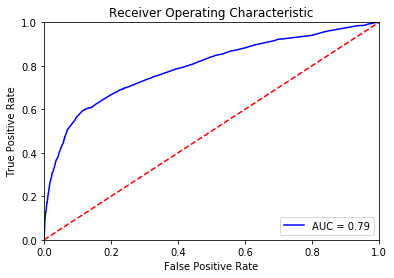

In [56]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

** Plotting feature importances **

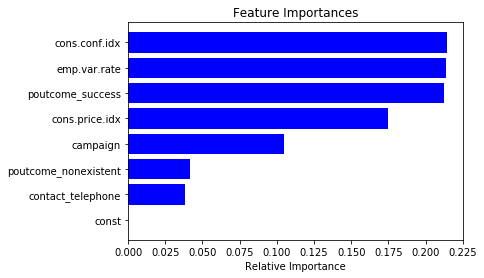

In [57]:
features= X_train.columns[[0,1,2,3,4,5,6,7]]
importances = gs.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [58]:
from sklearn.metrics import precision_score, recall_score
precision_score(Y_test, predictions)
# print(predicted_classes)

0.6635859519408502

In [59]:
recall_score(Y_test, predictions)

0.25716332378223494

### With RandomForest, with a max_depth of 10, the model produced an accuracy of 0.90 with an AUC score of 0.79 which is better than the binomial GLM.